In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [5]:
!python honors.py

In [6]:
import glob
all_files = glob.glob("Storing_csv_files_3" + "/*.csv")
frame = []
for filename in all_files:
    df = pd.read_csv(filename)
    frame.append(df) 
original_df = pd.concat(frame)


In [7]:
original_df

,Unnamed: 0,Summary,Issue id,Status,Assignee,Updated,Last Viewed,Original estimate,Time Spent,Custom field (Start date),...,Random_Assignee,percent_random,percent_sign,percentage,Due date,Label,percent_random_time_spent,percent_sign_time_spent,percentage_time_spent,Random_time_spent
0,0,Problem statement,10018,Done,Alexey,3/7/2022 13:12,3/7/2022 13:14,12,12.826985,2021-11-01,...,Angie,1.603110,2,3.206221,2022-03-22,0,0.568915,2,1.137831,12.826985
1,1,Project Proposal,10019,Done,Angie,NaN,NaN,24,19.502708,2021-11-28,...,Violet,0.043981,-2,-0.087963,2021-12-31,0,1.937838,2,3.875677,19.502708
2,2,Assign project tasks to the team,10020,Done,Manoj,3/7/2022 13:13,3/7/2022 13:14,2,0.669527,2021-11-30,...,Alexey,0.856437,2,1.712874,2022-03-18,1,0.165237,-2,-0.330473,0.669527
3,3,Discuss budgeting,10021,Done,Violet,3/7/2022 13:04,3/7/2022 13:14,4,0.000000,2021-12-01,...,Bai Niang,1.492974,2,2.985948,2022-04-25,0,0.559747,2,1.119494,0.000000
4,4,Software Requirements Document,10022,Done,Latifah,3/7/2022 13:04,3/7/2022 13:14,48,103.471076,2021-12-02,...,Klaus,1.006903,2,2.013806,2022-03-29,0,1.655647,2,3.311295,103.471076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,15,View Foreign Exchange account,10033,Done,Mulan,3/7/2022 13:07,3/7/2022 13:14,36,-45.986731,2022-03-13,...,Violet,1.970333,2,3.940666,2022-06-28,0,1.416114,2,2.832228,-45.986731
16,16,Exchange currency tab,10034,Done,Mushu,3/7/2022 12:58,3/7/2022 13:14,48,30.319552,2022-04-04,...,Alexandra,1.698600,2,3.397201,2022-05-18,0,1.015978,2,2.031955,30.319552
17,17,User testing,10035,Done,Shang,3/7/2022 12:56,3/7/2022 13:14,8,-2.237213,2022-04-15,...,Max,1.802324,2,3.604647,2022-07-09,0,0.618607,2,1.237213,-2.237213
18,18,Vendors testing the software for any bugs,10036,Done,Jisoo,3/7/2022 12:56,3/7/2022 13:14,24,43.850126,2022-04-26,...,Lyte,0.590071,2,1.180141,2022-06-23,0,1.692506,2,3.385013,43.850126


In [8]:
original_df['Status'].fillna('Done', inplace = True)
transform_df = original_df[['Status','Random_Assignee']]
print(transform_df

encoder = OrdinalEncoder()
encoder.fit(transform_df)
final_df = encoder.transform(transform_df)
print(final_df)
#final_df = pd.DataFrame(final_df, columns = ['Status', 'Label(Binary) Project with all tasks', 'Assignee' ])
#final_df = pd.concat([final_df, original_df], axis = 1, ignore_indexing = True)
#final_df


   Status Random_Assignee
0    Done           Angie
1    Done          Violet
2    Done          Alexey
3    Done       Bai Niang
4    Done           Klaus
..    ...             ...
15   Done          Violet
16   Done       Alexandra
17   Done             Max
18   Done            Lyte
19   Done           Shang

[30000 rows x 2 columns]
[[ 0.  2.]
 [ 0. 17.]
 [ 0.  1.]
 ...
 [ 0. 13.]
 [ 0. 11.]
 [ 0. 16.]]


In [9]:
original_df['diff_dates'].isnull().any().any()

False

In [11]:
arr = original_df[['diff_dates','percent_random', 'Original estimate', 'diff_time_spent', 'Time Spent','Label']].to_numpy()


In [12]:
dataset = np.hstack((final_df,arr))

In [13]:
dataset

array([[  0.        ,   2.        ,  27.        , ...,  -0.82698452,
         12.82698452,   0.        ],
       [  0.        ,  17.        ,  17.        , ...,   4.49729229,
         19.50270771,   0.        ],
       [  0.        ,   1.        ,  29.        , ...,   1.33047328,
          0.66952672,   1.        ],
       ...,
       [  0.        ,  13.        ,  15.        , ...,  10.23721311,
         -2.23721311,   0.        ],
       [  0.        ,  11.        ,  18.        , ..., -19.85012556,
         43.85012556,   0.        ],
       [  0.        ,  16.        ,  22.        , ...,  -0.54622988,
          9.54622988,   0.        ]])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset[:,0:6], dataset[:,-1], test_size=0.3, random_state=32)
X_train.shape

(21000, 6)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors= 2 )
neigh.fit(X_train, y_train)
y_testing_prediction = neigh.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_testing_prediction)


0.9905555555555555

In [16]:
neigh = KNeighborsClassifier(n_neighbors= 3 )
neigh.fit(X_train, y_train)
y_testing_prediction = neigh.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_testing_prediction)


0.9912222222222222

In [17]:
# We are trying to rerun the python script because our data has to be randomized. 

neigh = KNeighborsClassifier(n_neighbors= 10)
neigh.fit(X_train, y_train)
y_testing_prediction = neigh.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_testing_prediction)

0.9884444444444445

In [18]:
neigh = KNeighborsClassifier(n_neighbors= 20)
neigh.fit(X_train, y_train)
y_testing_prediction = neigh.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_testing_prediction)

0.9833333333333333

In [19]:
neigh = KNeighborsClassifier(n_neighbors= 125)
neigh.fit(X_train, y_train)
y_testing_prediction = neigh.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_testing_prediction)

0.9444444444444444

In [20]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors= 2 )
neigh.fit(X_train, y_train)
y_testing_prediction = neigh.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_testing_prediction)
y_true=y_test

In [21]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_true, y_testing_prediction)

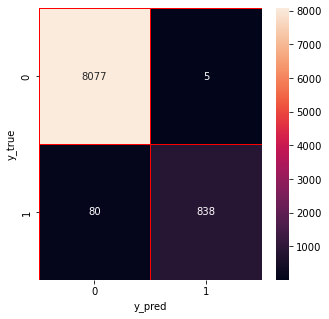

In [22]:
f, ax =plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [63]:
sum = 0

for x in range (1, 100):
    neigh = KNeighborsClassifier(n_neighbors= x)
    neigh.fit(X_train, y_train)
    y_testing_prediction = neigh.predict(X_test)
    x = x + 1
    from sklearn.metrics import accuracy_score
    sum = sum + accuracy_score(y_test, y_testing_prediction)*100
    print("K = ",x,accuracy_score(y_test, y_testing_prediction)*100)
    avg = sum/x
print(avg)
# Print out classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_testing_prediction))


K =  2 98.87777777777778
K =  3 98.97777777777777
K =  4 99.01111111111112
K =  5 98.97777777777777
K =  6 99.08888888888889
K =  7 98.86666666666667
K =  8 99.08888888888889
K =  9 98.87777777777778
K =  10 98.9888888888889
K =  11 98.84444444444445
K =  12 98.96666666666667
K =  13 98.78888888888889
K =  14 98.9
K =  15 98.77777777777777
K =  16 98.83333333333333
K =  17 98.71111111111112
K =  18 98.77777777777777
K =  19 98.61111111111111
K =  20 98.65555555555555
K =  21 98.52222222222223
K =  22 98.55555555555556
K =  23 98.4
K =  24 98.43333333333332
K =  25 98.24444444444444
K =  26 98.34444444444445
K =  27 98.1888888888889
K =  28 98.26666666666667
K =  29 98.1
K =  30 98.15555555555555
K =  31 97.96666666666667
K =  32 98.0
K =  33 97.85555555555555
K =  34 97.87777777777778
K =  35 97.66666666666667
K =  36 97.73333333333333
K =  37 97.62222222222222
K =  38 97.64444444444445
K =  39 97.53333333333333
K =  40 97.56666666666666
K =  41 97.34444444444445
K =  42 97.41111111111

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset[:,0:6], dataset[:,-1], test_size=0.2, random_state=32)
X_train.shape

(24000, 6)

In [25]:
sum = 0

for x in range (1, 100):
    neigh = KNeighborsClassifier(n_neighbors= x)
    neigh.fit(X_train, y_train)
    y_testing_prediction = neigh.predict(X_test)
    x = x + 1
    from sklearn.metrics import accuracy_score
    sum = sum + accuracy_score(y_test, y_testing_prediction)*100
    print("K = ",x,accuracy_score(y_test, y_testing_prediction)*100)
    avg = sum/x
print(avg)

K =  2 98.88333333333334
K =  3 98.98333333333333
K =  4 99.06666666666666
K =  5 98.8
K =  6 98.91666666666666
K =  7 98.8
K =  8 98.95
K =  9 98.66666666666667
K =  10 98.8
K =  11 98.61666666666666
K =  12 98.8
K =  13 98.56666666666666
K =  14 98.65
K =  15 98.51666666666667
K =  16 98.61666666666666
K =  17 98.48333333333333
K =  18 98.55000000000001
K =  19 98.21666666666667
K =  20 98.35000000000001
K =  21 98.15
K =  22 98.23333333333333
K =  23 97.93333333333332
K =  24 98.01666666666667
K =  25 97.88333333333334
K =  26 97.89999999999999
K =  27 97.75
K =  28 97.8
K =  29 97.55
K =  30 97.6
K =  31 97.45
K =  32 97.5
K =  33 97.38333333333333
K =  34 97.5
K =  35 97.28333333333333
K =  36 97.33333333333334
K =  37 97.18333333333334
K =  38 97.25
K =  39 97.15
K =  40 97.16666666666667
K =  41 97.01666666666667
K =  42 97.06666666666666
K =  43 96.81666666666666
K =  44 96.83333333333334
K =  45 96.65
K =  46 96.71666666666667
K =  47 96.56666666666666
K =  48 96.5833333333333

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset[:,0:6], dataset[:,-1], test_size=0.4, random_state=42)
X_train.shape

(18000, 6)

In [27]:
sum = 0

for x in range (1, 100):
    neigh = KNeighborsClassifier(n_neighbors= x)
    neigh.fit(X_train, y_train)
    y_testing_prediction = neigh.predict(X_test)
    x = x + 1
    from sklearn.metrics import accuracy_score
    sum = sum + accuracy_score(y_test, y_testing_prediction)*100
    print("K = ",x,accuracy_score(y_test, y_testing_prediction)*100)
    avg = sum/x
print(avg)

K =  2 98.78333333333333
K =  3 98.85000000000001
K =  4 98.9
K =  5 98.80833333333334
K =  6 98.91666666666666
K =  7 98.75833333333334
K =  8 99.0
K =  9 98.80833333333334
K =  10 98.98333333333333
K =  11 98.825
K =  12 98.94166666666668
K =  13 98.73333333333333
K =  14 98.86666666666667
K =  15 98.65833333333333
K =  16 98.76666666666667
K =  17 98.56666666666666
K =  18 98.675
K =  19 98.35833333333333
K =  20 98.45
K =  21 98.25833333333334
K =  22 98.275
K =  23 98.125
K =  24 98.2
K =  25 98.03333333333333
K =  26 98.1
K =  27 97.89999999999999
K =  28 97.94166666666668
K =  29 97.74166666666667
K =  30 97.78333333333333
K =  31 97.58333333333333
K =  32 97.63333333333334
K =  33 97.45833333333334
K =  34 97.5
K =  35 97.26666666666667
K =  36 97.29166666666667
K =  37 97.18333333333334
K =  38 97.2
K =  39 97.125
K =  40 97.13333333333334
K =  41 97.05
K =  42 97.05833333333334
K =  43 97.01666666666667
K =  44 97.02499999999999
K =  45 96.95
K =  46 97.0
K =  47 96.941666666

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset[:,0:6], dataset[:,-1], test_size=0.3, random_state=42)
X_train.shape

(21000, 6)

In [58]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC() # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [59]:
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [60]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9341111111111111


In [61]:
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.3333333333333333


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      8133
         1.0       0.95      0.33      0.49       867

    accuracy                           0.93      9000
   macro avg       0.94      0.67      0.73      9000
weighted avg       0.94      0.93      0.92      9000

